<a href="https://www.kaggle.com/code/muradpitafi/playground-series-software-defects?scriptVersionId=147005086" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e23/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e23/test.csv')

In [3]:
train.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
test.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [5]:
test.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
dtype: int64

In [6]:
test.shape

(67842, 22)

In [7]:
train.shape

(101763, 23)

In [8]:
train.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [9]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# for i in train.columns:
#     sns.histplot(x = i, data = train, kde = True)
#     plt.show()

In [10]:
train.nunique()


id                   101763
loc                     378
v(g)                    106
ev(g)                    71
iv(g)                    84
n                       836
v                      4515
l                        55
d                      3360
i                      5171
e                      8729
b                       315
t                      8608
lOCode                  298
lOComment                91
lOBlank                  94
locCodeAndComment        29
uniq_Op                  70
uniq_Opnd               176
total_Op                623
total_Opnd              485
branchCount             144
defects                   2
dtype: int64

In [11]:
# trains = train.copy()

In [12]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
 
# for i in trains.columns:
#     trains[i] = scaler.fit_transform(trains[[i]])

In [13]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import auc , accuracy_score
# import xgboost as xgb
# from catboost import CatBoostClassifier

In [14]:
# # x = train.drop(['id', 'defects'],axis = 1)
# # y = train['defects']
# # xtrain, xtest, ytrain , ytest = train_test_split(x,y, test_size = 0.25, random_state = 7)

# xt = train.drop(['id', 'defects'],axis = 1)
# yt = train['defects']
# xtraint, xtestt, ytraint , ytestt = train_test_split(xt,yt, test_size = 0.25, random_state = 7)



In [15]:
# knn = KNeighborsClassifier()
# dtr = DecisionTreeClassifier()
# lr = LogisticRegression()
# rfc = RandomForestClassifier()
# gb = GradientBoostingClassifier()
# # vc = VotingClassifier()
# xgb = xgb.XGBClassifier()
# # cat = CatBoostClassifier()
# dic = {'KNeighborsClassifier': knn, 'LogisticRegression': lr,
#        'DecisionTreeClassifier':dtr, 'RandomForestClassifier':rfc
#        , 'GradientBoostingClassifier': gb
#           ,'XGBoost': xgb}


In [16]:
#  for key in dic:
#     print(key)
#     dic[key].fit(xtraint, ytraint)
#     print('training ' ,dic[key].score(xtraint, ytraint))
#     print('testing ' , dic[key].score(xtestt,ytestt))
#     print(" ")

In [17]:
# parameters = {
#     'KNeighborsClassifier': {'n_neighbors': [3, 5, 7,9]},
#     'LogisticRegression': {'C': [0.1, 1, 10]},
#     'DecisionTreeClassifier': {'max_depth': [5, 10, 20, 30]},
#     'RandomForestClassifier': {'n_estimators': [50, 100, 200]},
#     'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.2, 0.3]},
#     'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]  }
# }

In [18]:
# from sklearn.model_selection import GridSearchCV

# def best_hyp(models, parameters, xtrain, ytrain, xtest, ytest):
#     best_models = {}
    
#     for model_name, model in models.items():
#         print(model_name)
#         grid_search = GridSearchCV(model, parameters[model_name], cv=5, n_jobs=-1, scoring='accuracy')
#         grid_search.fit(xtrain, ytrain)
        
#         best_model = grid_search.best_estimator_
#         best_models[model_name] = best_model
        
#         print('Best Hyperparameters:', grid_search.best_params_)
#         print('Training Accuracy:', best_model.score(xtrain, ytrain))
#         print('Testing Accuracy:', best_model.score(xtest, ytest))
#         print()
    
#     return best_models

In [19]:
# best_hyperparameters = best_hyp(dic, parameters, xtrain, ytrain, xtest, ytest)
# print(best_hyperparameters)

In [20]:
# d = pd.Series(train['defects'])


In [21]:
# # #three models gb, dtr, xgb
# testing = test.drop('id', axis = 1)
# dtr = DecisionTreeClassifier(max_depth=5)
# dtr.fit(xtrain,ytrain)
# gb_pred = dtr.predict(testing)

In [22]:
# # testing.head()
# trains.head()
# testing = test.copy()

In [23]:
# for i in testing.columns:
#     testing[i] = scaler.fit_transform(testing[[i]])

In [24]:
# from xgboost import XGBClassifier

# testing = test.drop('id', axis = 1)
# xgbb = XGBClassifier(learning_rate = 0.01, n_estimators = 200)
# xgbb.fit(xtraint,ytraint)
# xgb_pred = xgbb.predict_proba(testing)

In [25]:
# len_predicted = len(gb_pred)  # Replace 'predicted_values' with your actual variable
# len_actual = len(ytest)


In [26]:
# if len_predicted != len_actual:
#     print("Sample sizes do not match.")
# else:
#     print("Sample sizes match.")


In [27]:
# predicted_values = gb_pred[:len_actual]
# print(accuracy_score(ytest, predicted_values))

In [28]:
# from sklearn.metrics import accuracy_score, classification_report

# accuracy = accuracy_score(ytest, predicted_values)
# report = classification_report(ytest, predicted_values)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", report)


In [29]:
# test.shape

In [30]:
# # Create a DataFrame for the submission
# submission_df = pd.DataFrame({
#     'id': test['id'],  # Assuming 'PassengerId' is the ID column in your test data
#     'defacts': gb_pred  # These are your model's predictions
# })

# # Save the submission DataFrame to a CSV file
# submission_df.to_csv('submission.csv', index=False)

In [31]:
# !pip install catboost

In [32]:
# from catboost import CatBoostClassifier, Pool, cv
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score


In [33]:
# train_data = Pool(xtrain, label=ytrain)
# test_data = Pool(xtest, label=ytest)


In [34]:
# # Create a DataFrame for the submission
# submission_df = pd.DataFrame({
#     'id': test['id'],  # Assuming 'PassengerId' is the ID column in your test data
#     'defacts': xgb_pred  # These are your model's predictions
# })

# # Save the submission DataFrame to a CSV file
# submission_df.to_csv('submission.csv', index=False)

In [35]:
import scikitplot as skplt
from sklearn.model_selection import StratifiedKFold,cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score


In [36]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [37]:
xtr , ytr = train.drop('defects', axis = 1), train['defects']

In [38]:
lgbm = LGBMClassifier()
kf = StratifiedKFold(n_splits = 10)
scores = cross_val_score(lgbm, xtr, ytr, scoring = 'roc_auc', 
                        cv = kf, n_jobs = -1)
print(f'{lgbm.__class__.__name__} auroc score: {scores.mean()}')

LGBMClassifier auroc score: 0.7895892482355839


In [39]:
# gbc = GradientBoostingClassifier()
# kf = StratifiedKFold(n_splits = 10)
# scores = cross_val_score(gbc, xtr, ytr, scoring = 'roc_auc', 
#                         cv = kf, n_jobs = -1)
# print(f'{gbc.__class__.__name__} auroc score: {scores.mean()}')

In [40]:
hist = HistGradientBoostingClassifier()
scores = cross_val_score(hist, xtr, ytr,
                        scoring = 'roc_auc',
                        cv = kf, 
                        n_jobs = -1)
print(f'{hist.__class__.__name__} auroc score : {scores.mean()}')

HistGradientBoostingClassifier auroc score : 0.7898326568148488


In [41]:
cat = CatBoostClassifier(verbose = False)

scores = cross_val_score(cat, xtr,
                        ytr,scoring = 'roc_auc',
                        cv = kf,
                        n_jobs = -1)
print(f'{cat.__class__.__name__} auroc score : {scores.mean()}')

CatBoostClassifier auroc score : 0.7874396781235447


In [42]:
vc = VotingClassifier(estimators= [('lgbm', lgbm), ('cat', cat), ('hist', hist)],
                     voting = 'soft')

scores = cross_val_score(vc,xtr,ytr,
                        scoring = 'roc_auc',
                        cv = kf, n_jobs = -1)

print(f'{vc.__class__.__name__} auroc score: {scores.mean()}')

VotingClassifier auroc score: 0.790419901966566


/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


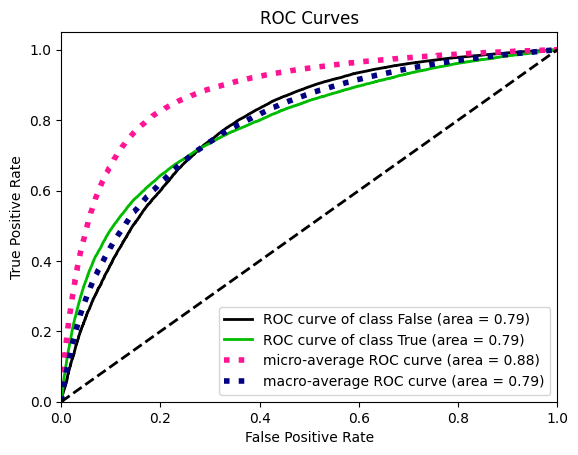

In [43]:
import matplotlib.pyplot as plt
prob = cross_val_predict(vc,xtr, ytr,
                        cv = kf, 
                        method = 'predict_proba',
                        n_jobs= -1)

skplt.metrics.plot_roc_curve(ytr,prob)
plt.show()

In [44]:
vc.fit(xtr, ytr)
submission = pd.DataFrame({'id': test['id'], 'defects': pd.Series(vc.predict_proba(test)[:,1])})
submission.head()

,id,defects
0,101763,0.283518
1,101764,0.197963
2,101765,0.667056
3,101766,0.531186
4,101767,0.147518


In [45]:
submission.to_csv('submission.csv', index = False)